
# Графическая визуализация данных

Одной из важных частей в анализе данных является графическое
визуализация. Это может быть частью исследовательского процесса —
например, чтобы помочь идентифицировать выбросы или необходимые
преобразования данных, или как способ генерирования идей для
моделей. В Python есть много дополнительных библиотек для создания
статических или динамических визуализаций, но мы сосредоточемся в
основном на `matplotlib` и библиотеках, которые построены на её
основе. 

Со временем `matplotlib` породила ряд дополнительных наборов инструментов
для визуализации данных, которые используют `matplotlib` в качестве
«ядра». Одним из таких инструментов является `seaborn`.

# Краткий пример использования `matplotlib`

Для импорта библиотеки `matplotlib` будем использовать следующее
соглашение:

In [ ]:
import matplotlib.pyplot as plt

Ниже приведен пример построения простой прямой:

In [ ]:
import numpy as np

In [ ]:
data = np.arange(10)

In [ ]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

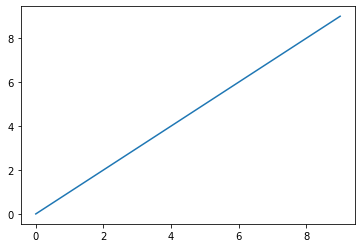

In [ ]:
plt.plot(data)

## Рисунки и подграфики

Графики в `matplotlib` находятся внутри объекта `Figure`. Новый
рисунок можно создать с помощью `plt.figure`:

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

В интерпретаторе IPython будет построено пустое окно, а в блокноте
Jupyter ничего не произойдет. Нельзя создавать окно с пустым
рисунком. Нужно создать один или несколько подграфиков (subplots),
используя функцию `add_subplot`

In [ ]:
fig.add_subplot(2, 2, 1)

<AxesSubplot:>

Это означает, что рисунок должен быть размером $2 \times 2$
(т.е. содержать максимум 4 графика), и мы выбрали первый из четырех
графиков (нумерация начинается с единицы). Можно выбрать следующие 2
графика:

In [ ]:
ax2 = fig.add_subplot(2, 2, 2)

In [ ]:
ax3 = fig.add_subplot(2, 2, 3)

Если выполнить команду построения графика, например, `plt.plot([1.5, 3.5, -2, 1.6])`,
вывод будет осуществляться в последний график последнего созданного
рисунка. Например, выполнение команды

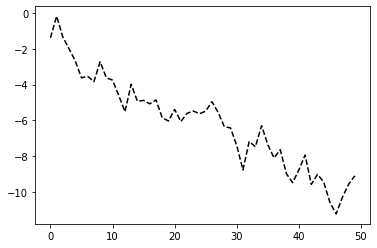

In [ ]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

Выражение `'k--'` задает стиль линии: черная штриховая линия. 
Метод `fig.add_subplot` возвращает объект `AxesSubplot`, в который
можно напрямую выводить график:

In [ ]:
ax1 = fig.add_subplot(2, 2, 2)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [ ]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Полный каталог типов графиков можно найти на сайте <https://matplotlib.org/>.

Как вы заметили представленные выше команды, выполняемые в отдельных
ячейках, в блокноте Jupyter не работают. Для того чтобы строить
подграфики в Jupyter нужно все команды выполнять в одной ячейке:

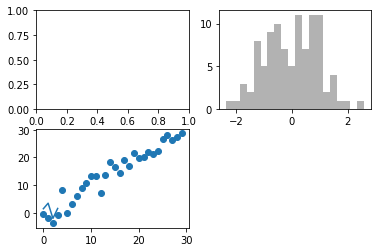

In [ ]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

## Цвет, маркеры и стили линий

Основная функция `plot` библиотеки `matplotlib` принимает массивы
координат `x` и `y` и (опционально) строку, задающую цвет и стиль
линии. Например, для того чтобы построить зависимость `y` от `x`
зелеными штрихами, необходимо выполнить:

```Python
        ax.plot(x, y, 'g--')
```

Таким образом, мы задали и цвет и стиль линии в виде строки. На
практике при программном создании графиков использование строк не
удобно. Такой же график можно построить с помощью команды:

```Python
        ax.plot(x, y, linestyle='--', color='g')
```

Графики могут иметь также маркеры для выделения точек данных. Так как
`matplotlib` создает непрерывные линии, интерполируя значения между
заданными точками, может быть не ясно, где находятся заданные
значения. Маркеры могут быть частью строки, задающей стиль линии:

In [ ]:
from numpy.random import randn

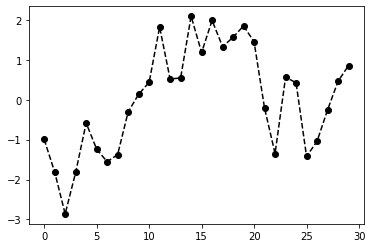

In [ ]:
plt.plot(randn(30).cumsum(), 'ko--')

Это же можно было записать более явно:

```Python
        plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

Как видно, между последовательными точками строится линейная
интерполяция. Это поведение можно изменить с помощью параметра
`drawstyle`:

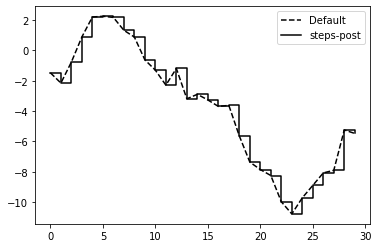

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## Подписи к осям, масштаб и легенда

Для иллюстрации настройки графиков создадим простой рисунок и
отобразим график случайного блуждания:

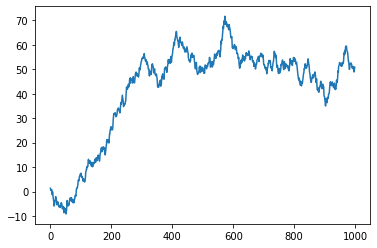

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Для изменения подписей на оси $x$ воспользуемся методами `set_xticks`
и `set_xticklables`:

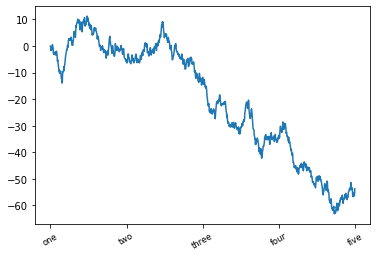

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

Параметр `rotation` поворачивает метки надписей на оси $x$ на 30
градусов. И, наконец, зададим название графика и метку для оси $x$ с
помощью методов `set_title` и `set_xlabel`:

Text(0.5, 0, 'Шаги')

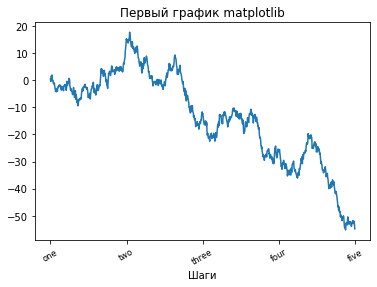

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('Первый график matplotlib')
ax.set_xlabel('Шаги')

Модификация оси $y$ осуществляется точно также, только нужно  заменить
`x` на `y` в приведенном выше коде. У класса осей есть метод `set`,
который допускает пакетную настройку свойств графика. В предыдущем 
примере можно было также написать:

```Python
        props = {
            'title': 'Первый график matplotlib',
            'xlabel': 'Шаги
        }
        ax.set(**props)
```

Для вывода легенды графика есть несколько способов. Простейший
заключается в передаче аргумента `label` при построении графиков:

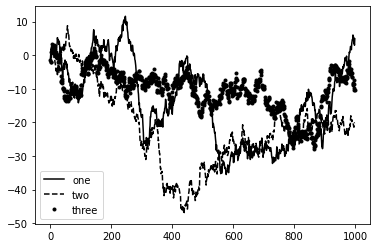

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

## Сохранение рисунков в файл

Можно сохранить активный рисунок в файл с помощью метода
`plt.savefig`. Например, чтобы сохранить рисунок в формате SVG
достаточно набрать:

```Python
        plt.savefig('figpath.svg')
```

Тип файла определяется расширением. Есть пара важных параметров:
`dpi`, который задает разрешение рисунка (точек на дюйм),
`bbox_inches`, который может обрезать пустое пространство вокруг
рисунка. Например, чтобы сохранить тот же график в формате PNG с
разрешением 400 DPI, нудно выполнить:

```Python
        plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

Функция `savefig` сохраняет не только на диск. Она может записывать
график в любой файлоподобный объект, например в `BytesIO`:

```Python
        from io import BytesIO
        buffer = BytesIO()
        plt.savefig(buffer)
        plot_data = buffer.getvalue()
```

## Таблица 1 : Метод `savefig`: параметры


<table border="1">
<thead>
<tr><th align="left">        Параметр        </th> <th align="left">                                                   Описание                                                   </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>fname</code>                     </td> <td align="left">   Строка, содержащая путь к файлу или файлоподобный объект Python. Формат рисунка определяется расширением файла    </td> </tr>
<tr><td align="left">   <code>dpi</code>                       </td> <td align="left">   Разрешение рисунка в точках на дюйм. По умолчанию 100                                                             </td> </tr>
<tr><td align="left">   <code>facecolor</code>, <code>edgecolor</code>    </td> <td align="left">   Цвет фона рисунка вне графика. По умолчанию <code>w</code> (белый)                                                           </td> </tr>
<tr><td align="left">   <code>format</code>                    </td> <td align="left">   Явное задание формата файла                                                                                       </td> </tr>
<tr><td align="left">   <code>bbox_inches</code>               </td> <td align="left">   Часть рисунка для сохранения. Если задано <code>'tight'</code>, 2будет попытка обрезать пустое пространство вокруг           </td> </tr>
</tbody>
</table>


# Построение графиков с помощью `pandas` и `seaborn`

Библиотека `matplotlib` может быть инструментом довольно низкого
уровня. График собирается из его базовых компонентов: отображения
данных (т.е. тип графика: линия, полоса, прямоугольник, разброс,
контур и т.д.), легенды, заголовка, меток и других аннотаций. В
библиотеке `pandas` мы можем получить множество столбцов данных, а
также метки строк и столбцов. В `pandas` имеются встроенные методы,
которые упрощают визуализацию объектов `DataFrame` и `Series`. Еще
одна библиотека для статистических графиков — `seaborn`.

In [ ]:
import numpy as np
import  pandas as pd

## Линейные графики

Объекты `Series` и `DataFrame` имеют метод `plot` для создания базовых
типов графиков. По умолчанию `plot()` создает линейные графики

<AxesSubplot:>

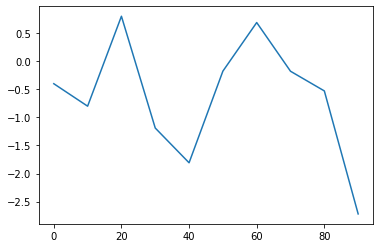

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Индекс объекта `Series` передается в `plot` библиотеки `matplotlib`
для оси $x$. При этом такое поведение можно отключить с помощью
параметра `use_index = False`. В таблице дается полный список параметров функции `Series.plot`.

Большинство графических методов `pandas` принимают опциональный
параметр `ax`, который может являться объектом `subplot`. Это
позволяет размещать подграфики на сетке.




## Таблица 2 : Параметры метода `Series.plot`


<table border="1">
<thead>
<tr><th align="left">  Параметр </th> <th align="left">                                                   Описани                                                   </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>label</code>        </td> <td align="left">   Метка для легенды                                                                                                </td> </tr>
<tr><td align="left">   <code>ax</code>           </td> <td align="left">   Объект <code>subplot</code> из <code>matplotlib</code>, в который выводится график. Если не задан — вывод идет в активный подграфик    </td> </tr>
<tr><td align="left">   <code>style</code>        </td> <td align="left">   Строка, задающая стиль графика (например, <code>ko--</code>)                                                                </td> </tr>
<tr><td align="left">   <code>alpha</code>        </td> <td align="left">   Прозрачность заполнения графика (от 0 до 1)                                                                      </td> </tr>
<tr><td align="left">   <code>kind</code>         </td> <td align="left">   Тип графика. Может быть: 'area' , 'bar' , 'barh' , 'density', 'hist' , 'kde' , 'line' , 'pie'                    </td> </tr>
<tr><td align="left">   <code>logy</code>         </td> <td align="left">   Использовать ли логарифмический масштаб по оси <code>y</code>                                                               </td> </tr>
<tr><td align="left">   <code>use_index</code>    </td> <td align="left">   Использовать ли объект индекс для меток оси                                                                      </td> </tr>
<tr><td align="left">   <code>rot</code>          </td> <td align="left">   Поворот меток оси                                                                                                </td> </tr>
<tr><td align="left">   <code>xticks</code>       </td> <td align="left">   Значения для меток оси <code>x</code>                                                                                       </td> </tr>
<tr><td align="left">   <code>yticks</code>       </td> <td align="left">   Значения для меток оси <code>x</code>                                                                                       </td> </tr>
<tr><td align="left">   <code>xlim</code>         </td> <td align="left">   Границы по оси <code>x</code> (например, <code>[0, 10]</code>)                                                                         </td> </tr>
<tr><td align="left">   <code>ylim</code>         </td> <td align="left">   Границы по оси <code>y</code>                                                                                               </td> </tr>
<tr><td align="left">   <code>grid</code>         </td> <td align="left">   Отображать ли сетку по осям (включено по умолчанию)                                                              </td> </tr>
</tbody>
</table>


Метод `plot` объекта `DataFrame` выводит график для каждого столбца
данных в виде линии на одном и том же подграфике, создавая при этом
легенду автоматически:

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))

<AxesSubplot:>

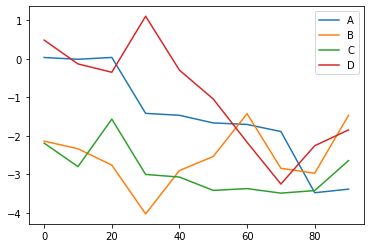

In [ ]:
df.plot()

Атрибут `plot` содержит «семейство» методов для различных типов
графиков. Например, `df.plot()` эквивалентно `df.plot.line()`.

В `DataFrame` есть несколько параметры, которые обеспечивают некоторую
гибкость при обработке столбцов. Например, следует ли разместить их
все на одном подграфике или создавать отдельные. В таблице
представлены такие параметры.


## Таблица 3 : Специфичные для `DataFrame` параметры `plot` <div id="visual:plt-with-pandas:tbl:2"></div>


<table border="1">
<thead>
<tr><th align="left">   Параметр   </th> <th align="left">                                   Описание                                   </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>subplots</code>        </td> <td align="left">   Рисовать ли каждый столбец <code>DataFrame</code> в отдельном подграфике                     </td> </tr>
<tr><td align="left">   <code>sharex</code>          </td> <td align="left">   Если <code>subplots=True</code>, использовать ли одну и ту же ось <code>x</code>, связывая метки оси    </td> </tr>
<tr><td align="left">   <code>sharey</code>          </td> <td align="left">   Если <code>subplots=True</code>, использовать ли одну и ту же ось <code>y</code>                        </td> </tr>
<tr><td align="left">   <code>figsize</code>         </td> <td align="left">   Размер рисунка для создания в виде кортежа                                        </td> </tr>
<tr><td align="left">   <code>title</code>           </td> <td align="left">   Заголовок рисунка в виде строки                                                   </td> </tr>
<tr><td align="left">   <code>legend</code>          </td> <td align="left">   Добавлять ли легенду на рисунок (по умолчанию <code>True</code>)                             </td> </tr>
<tr><td align="left">   <code>sort_columns</code>    </td> <td align="left">   Отображать ли столбцы в алфавитном порядке                                        </td> </tr>
</tbody>
</table>

## Столбчатые диаграммы

Методы `plot.bar()` и `plot.barh()` строят вертикальные и
горизонтальные столбчатые диаграммы. В этом случае индексы объектов
`Series` и `DataFrame` в качестве меток на оси `x` (`bar`) или `y`
(`barh`).

<AxesSubplot:>

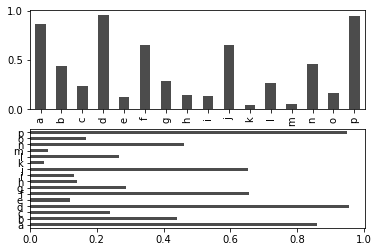

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Параметры `color='k`' и `alpha=0.7` устанавливают цвет графика в
черный и частичную прозрачность для заполнения.

В `DataFrame` столбчатые диаграммы группируют каждую строку значений
вместе в группу столбиков, соответствующих каждому значению в строке:

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [ ]:
df

Genus,A,B,C,D
one,0.029861,0.985691,0.841800,0.538494
two,0.807953,0.099743,0.482649,0.585026
three,0.650091,0.573835,0.682240,0.290596
four,0.764525,0.937239,0.411027,0.872114
five,0.063225,0.637367,0.198528,0.140309
six,0.436890,0.982143,0.575153,0.941775


<AxesSubplot:>

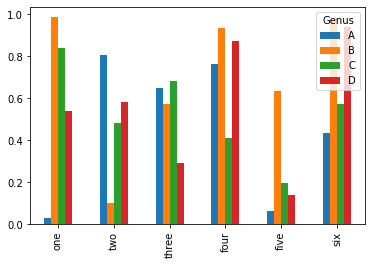

In [ ]:
df.plot.bar()

Обратите внимание на то, что имя столбцов `'Genus'` используется в
качестве заголовка легенды. Для создания столбчатых диаграмм с
накоплением для `DataFrame` задается параметр `stacked=True`, в
результате чего значение в каждой строке будут сгруппировано вместе

<AxesSubplot:>

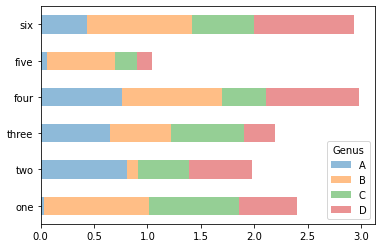

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

Предположим, что есть набор данных по счетам и чаевым в ресторане, и
нам нужно построить столбчатую диаграмму с накоплением, показывающую
процентное соотношение точек данных для каждого размера группы в
каждый день.  Загрузим данные из файла
tips.csv и создадим сводную по дням и размеру вечеринки
(количество человек):

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tips = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/занятие 2/tips.csv')

In [ ]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [ ]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
party_counts = party_counts.loc[:, 2:5]

Теперь нормализуем данные так, чтобы сумма в каждой строке была равна
$1$ и построим столбчатую диаграмму:

In [ ]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [ ]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

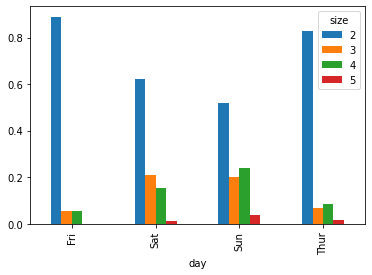

In [ ]:
party_pcts.plot.bar()

Таким образом, видно, что количество участников вечеринок
в данном наборе увеличивается в выходные дни.

В случае, если требуется агрегировать или суммировать данные перед
построением графика, использование пакета `seaborn` может значительно
упростить задачу. Давайте посмотрим на процент чаевых в день с помощью
библиотеки `seaborn`:

In [ ]:
import seaborn as sns

In [ ]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [ ]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

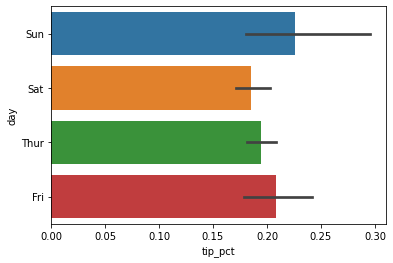

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Функция `barplot` библиотеки `seaborn` принимает параметр `data`, который
может быть объектом `DataFrame`. Остальные параметры ссылаются на
имена столбцов. Поскольку в день имеется несколько наблюдений, то
столбцы диаграммы представляют собой среднее значение параметра
`tip_pct`. Черные линии, нарисованные на столбцах диаграммы,
представляют 95-процентный доверительный интервал (это можно настроить
с помощью опционального параметра). 

Функция `barplot` имеет параметр `hue`, который позволяет разделить
отображение по дополнительному категориальному значению:

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

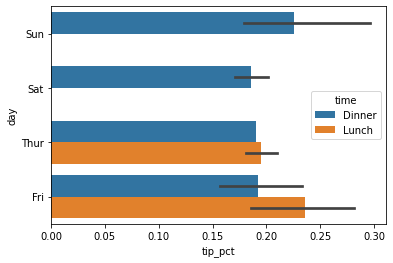

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

## Гистограммы и графики плотности распределения

*Гистограмма* — это своего рода столбчатая диаграмма, которая дает
дискретное отображение частоты значений.  Составим гистограмму
процентных долей от общего счета, используя метод `plot.hist` объекта
`Series`:

<AxesSubplot:ylabel='Frequency'>

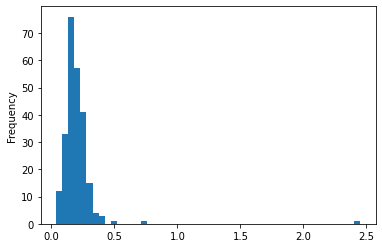

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

Связанный с гистограммой тип графиков — *график плотности*, 
который формируется путем вычисления оценки непрерывного распределения
вероятности, которое могло бы генерироваться наблюдаемыми данными.
Обычная процедура заключается в аппроксимации этого распределение как
смеси «ядер», то есть более простых распределений, таких как нормальное
распределение. Таким образом, графики под графиками плотности также
можно понимать графики оценки плотности ядра
(*K*ernel *D*ensity *E*stimate). Функции `plot.kde` и `plot.density`
строят график плотности, используя подход KDE:

<AxesSubplot:ylabel='Density'>

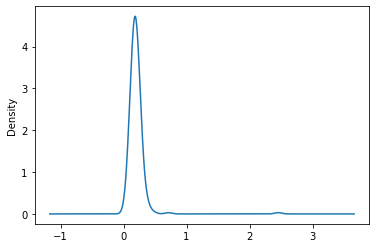

In [ ]:
tips['tip_pct'].plot.kde()

Библиотека `seaborn` упрощает создание гистограмм и графиков плотности
с помощью метода `distplot`, который позволяет одновременно строить как
гистограмму, так и непрерывную оценку плотности. В качестве примера
рассмотрим бимодальное распределение, состоящее из двух разных
стандартных нормальных распределений:

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

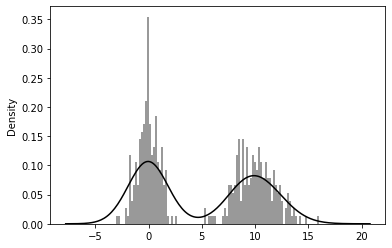

In [ ]:
sns.distplot(values, bins=100, color='k')

## Диаграммы рассеяния или точечные графики

Диаграммы рассеяния полезны при изучении связей между двумя одномерными
рядами данных. Например, загрузим набор данных из файла
macrodata.csv проекта Statmodels. Выберем
некоторые переменные и вычислим «логарифмические разности»:

In [ ]:
macro = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/занятие 2/macrodata.csv')

In [ ]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [ ]:
trans_data = np.log(data).diff().dropna()

In [ ]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Теперь воспользуемся функцией `regplot` библиотеки `seaborn`, которая
строит графики рассеяния и предлагает график линейной регрессии:

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Зависимость $\\log$ m1 от $\\log$ unemp')

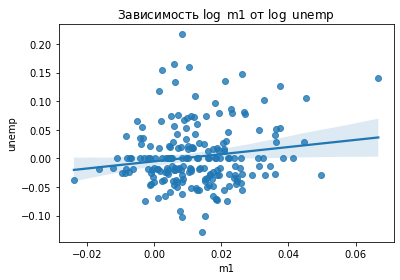

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Зависимость $\log$ {} от $\log$ {}'.format('m1', 'unemp'))

При анализе данных полезно иметь возможность просматривать все
диаграммы рассеяния среди группы переменных, т.е. строить, так
называемые, *парные графики* или *матрицу диаграмм рассеяния*. В
библиотеке `seaborn` для этого есть удобная функция `pairplot`,
которая, в частности, поддерживает размещение гистограмм или оценок
плотности каждой переменной по диагонали:

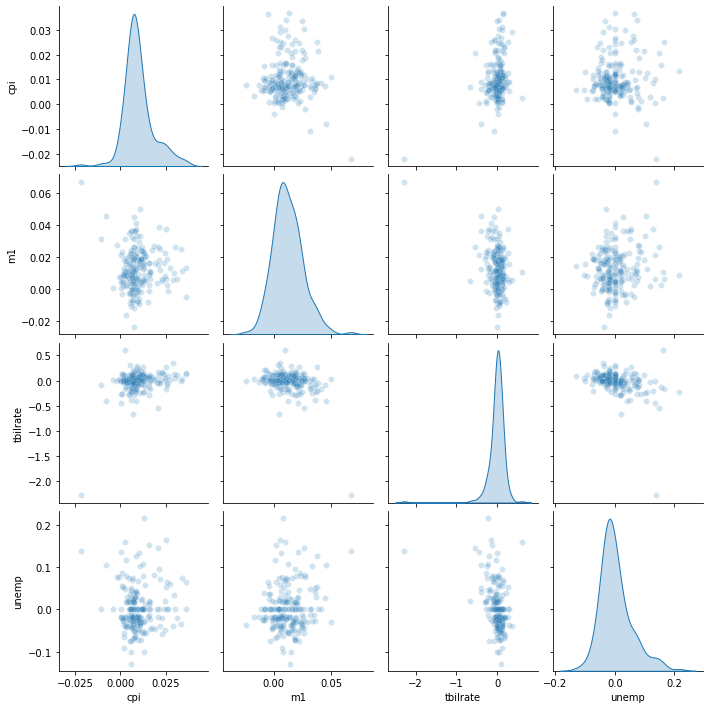

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Категориальные данные

Одним из способов визуализации данных с множеством категориальных
переменных является использование сетки фасетов (*facet grid*). В
библиотеке `seaborn` есть удобная функция `catplot`, которая
упрощает создание сетки фасетов:

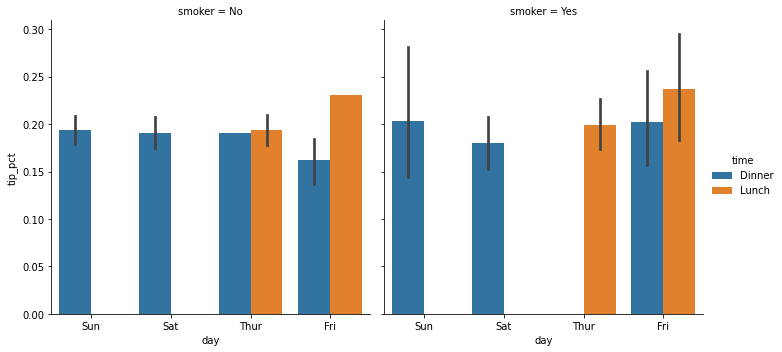

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Вместо отображения разными цветами  столбцов диаграмм в фасете мы
также можем расширить сетку фасетов, добавив одну строку по времени:

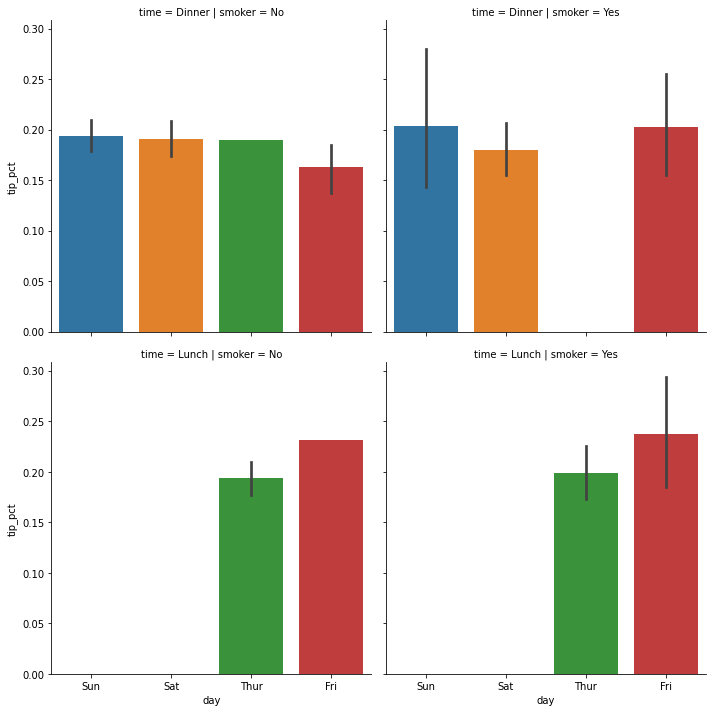

In [ ]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Функция `catplot` поддерживает другие типы графиков, которые могут быть
полезны. Например, блочные графики, которые показывают медиану,
квартили и выбросы:

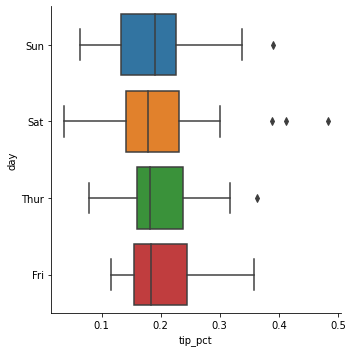

In [ ]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

Можно создавать свои собственные сетки фасетов,
используя более общий класс `seaborn.FacetGrid` (см.
[документацию seaborn](https://seaborn.pydata.org/)).







<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "visual" -->
<!-- doconce-section-nickname: "plt-with-pandas" -->
<!-- End: -->




<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "visual" -->
<!-- End: -->